In [ ]:
!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
import scipy.io
from scipy.stats import mode
from scipy.spatial import distance_matrix
!mv mnist.mat?raw=true mnist.mat
mat = scipy.io.loadmat('mnist.mat')

--2021-10-31 19:48:08--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2021-10-31 19:48:08--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2021-10-31 19:48:08--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.random import randint

testX= mat['testX']
testY = np.squeeze(mat['testY'])
trainX= mat['trainX']
trainY = np.squeeze(mat['trainY'])

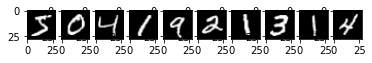

In [ ]:
im_ix = 20

fig, ax = plt.subplots(1, 10)

for col in range(10):
  im = trainX[col]
  im = np.reshape(im, (28, 28))
  ax[col].imshow(im, cmap='gray')


In [ ]:
nr_test = 1000
euclidianX = []
euclidianY = []
for nr_train in range (2000, 12000, 2000):
  dist = np.zeros((nr_train, nr_test))

  dist = distance_matrix(trainX[:nr_train, :], testX[:nr_test, :])
  predictions = np.zeros(nr_test)
  for test_ix in range(nr_test):
    smallest_value_index = np.argsort(dist[:, test_ix])
    predictions[test_ix] = trainY[smallest_value_index[0]]

    predictions = predictions.astype(np.int64)

  difference = predictions - testY[:nr_test]
  percentage_success = (np.sum((difference == 0) * 1) / nr_test) * 100

  print("For training set of size: %d with fixed size of %d test sample, the percantage correct was: %.3f%%."%(nr_train, nr_test, percentage_success))
  
  euclidianY.append(percentage_success)
  euclidianX.append(nr_train)


For training set of size: 2000 with fixed size of 1000 test sample, the percantage correct was: 87.300%.
For training set of size: 4000 with fixed size of 1000 test sample, the percantage correct was: 89.500%.
For training set of size: 6000 with fixed size of 1000 test sample, the percantage correct was: 90.400%.
For training set of size: 8000 with fixed size of 1000 test sample, the percantage correct was: 90.700%.
For training set of size: 10000 with fixed size of 1000 test sample, the percantage correct was: 92.000%.


In [ ]:
percentY = []

for s in euclidianY:
  percentY.append(s/100)

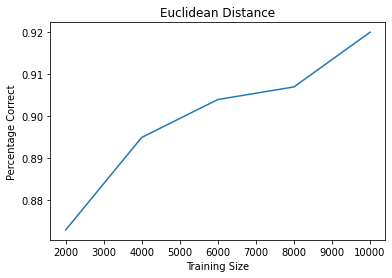

In [ ]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Training Size")
ax.set_ylabel("Percentage Correct")
ax.set_title("Euclidean Distance")
ax.plot(euclidianX,percentY)

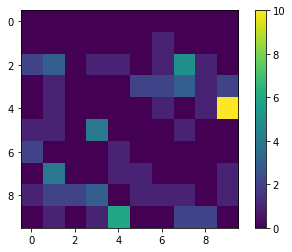

In [ ]:
cMatrix = np.zeros((10,10))
for ix in range(nr_test):
  cMatrix[testY[ix], predictions[ix]] += 1
cMatrix = np.multiply(cMatrix, 1 - np.eye(10))

plt.imshow(cMatrix)
plt.colorbar()

In [ ]:
from sklearn.metrics import confusion_matrix
total_labels = []

#allows to see how many labels there are for each label
for ix in range(nr_test):
  total_labels.append(testY[ix])

#creates a confusion matrix which will then be used to calculate the probability of occuring
confusionMatrix = confusion_matrix(total_labels, predictions)

print(confusionMatrix)

#This is the method we are using to get the row total and the true positive and get the probability barchart. 
row = 0
col = 0
true_positive = []
for i in confusionMatrix:
  flag = 0
  for j in i:
    flag += j
    if row == col:
      true_positive.append(j)
    col += 1
  row +=1
  col = 0

row_total = confusionMatrix.sum(axis=0)

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 125   0   0   0   0   1   0   0   0]
 [  2   3 102   1   1   0   1   5   1   0]
 [  0   1   0  96   0   2   2   3   1   2]
 [  0   1   0   0  97   0   1   0   1  10]
 [  1   1   0   4   0  80   0   1   0   0]
 [  2   0   0   0   1   0  84   0   0   0]
 [  0   4   0   0   1   1   0  92   0   1]
 [  1   2   2   3   0   1   1   1  77   1]
 [  0   1   0   1   6   0   0   2   2  82]]


In [ ]:
nr_train = 1000
EuclidianX = []
EuclidianY = []
for nr_test in range (1000, 8000, 1000):
  dist = np.zeros((nr_train, nr_test))

  dist = distance_matrix(trainX[:nr_train, :], testX[:nr_test, :])
  predictions = np.zeros(nr_test)
  for test_ix in range(nr_train):
    smallest_value_index = np.argsort(dist[:, test_ix])
    predictions[test_ix] = trainY[smallest_value_index[0]]

    predictions = predictions.astype(np.int64)

  difference = predictions - testY[:nr_test]
  percentage_success_for_test = (np.sum((difference == 0) * 1) / nr_test) * 100

  print("For test set of size: %d with fixed size of %d training sample, the percantage correct was: %.3f%%."%(nr_test, nr_train, percentage_success_for_test))
  
  EuclidianY.append(percentage_success_for_test)
  EuclidianX.append(nr_test)


For test set of size: 1000 with fixed size of 1000 training sample, the percantage correct was: 82.800%.
For test set of size: 2000 with fixed size of 1000 training sample, the percantage correct was: 45.900%.
For test set of size: 3000 with fixed size of 1000 training sample, the percantage correct was: 33.800%.
For test set of size: 4000 with fixed size of 1000 training sample, the percantage correct was: 27.825%.
For test set of size: 5000 with fixed size of 1000 training sample, the percantage correct was: 24.060%.
For test set of size: 6000 with fixed size of 1000 training sample, the percantage correct was: 21.850%.
For test set of size: 7000 with fixed size of 1000 training sample, the percantage correct was: 20.214%.


In [ ]:
percentY = []

for s in EuclidianY:
  percentY.append(s/100)

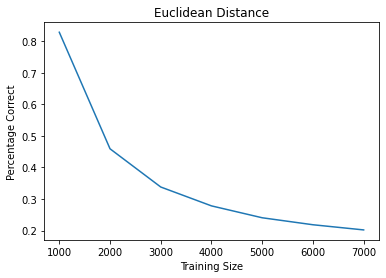

In [ ]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Training Size")
ax.set_ylabel("Percentage Correct")
ax.set_title("Euclidean Distance")
ax.plot(EuclidianX,percentY)

In [ ]:
#This uses the false_positives from the above confusion matrix to indicate the misclassification percentage.
probability = []
false_positive = []
for i in range (10):
  false_positive.append(row_total[i]-true_positive[i])  
  probability.append(false_positive[i] / row_total[i])

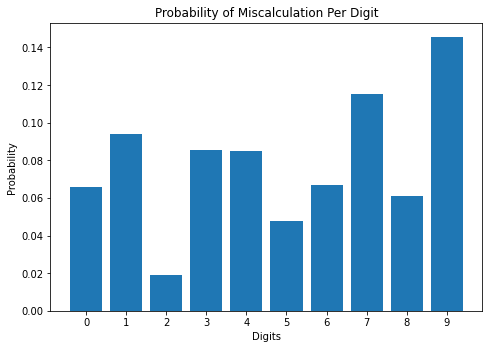

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
ax.bar(labels, probability)
ax.set_xlabel("Digits")
ax.set_ylabel("Probability")
ax.set_title("Probability of Miscalculation Per Digit")
plt.show()

In [ ]:
from scipy.spatial import distance
nr_test = 1000
cosineX = []
cosineY = []
for nr_train in range (2000, 12000, 2000):
  dist = np.zeros((nr_train, nr_test))

  dist = distance.cdist(trainX[:nr_train, :], testX[:nr_test, :], 'cosine')
  c_predictions = np.zeros(nr_test)
  for test_ix in range(nr_test):
    smallest_value_index = np.argsort(dist[:, test_ix])
    c_predictions[test_ix] = trainY[smallest_value_index[0]]

    c_predictions = c_predictions.astype(np.int64)

  difference = c_predictions - testY[:nr_test]
  c_percentage_success = (np.sum((difference == 0) * 1) / nr_test) * 100

  print("For training set of size: %d with fixed size of %d test sample, the percantage correct was: %.3f%%."%(nr_train, nr_test, c_percentage_success))
  
  cosineY.append(c_percentage_success)
  cosineX.append(nr_train)


For training set of size: 2000 with fixed size of 1000 test sample, the percantage correct was: 89.700%.
For training set of size: 4000 with fixed size of 1000 test sample, the percantage correct was: 91.600%.
For training set of size: 6000 with fixed size of 1000 test sample, the percantage correct was: 92.100%.
For training set of size: 8000 with fixed size of 1000 test sample, the percantage correct was: 92.900%.
For training set of size: 10000 with fixed size of 1000 test sample, the percantage correct was: 93.700%.


In [ ]:
percentY = []

for s in cosineY:
  percentY.append(s/100)

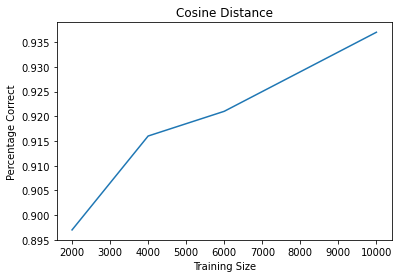

In [ ]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Training Size")
ax.set_ylabel("Percentage Correct")
ax.set_title("Cosine Distance")
ax.plot(cosineX,percentY)

In [ ]:
nr_train = 1000
cosineX = []
cosineY = []
for nr_test in range (1000, 8000, 1000):
  dist = np.zeros((nr_train, nr_test))

  dist = distance.cdist(trainX[:nr_train, :], testX[:nr_test, :], 'cosine')
  c_predictions = np.zeros(nr_test)
  for test_ix in range(nr_train):
    smallest_value_index = np.argsort(dist[:, test_ix])
    c_predictions[test_ix] = trainY[smallest_value_index[0]]

    c_predictions = c_predictions.astype(np.int64)

  difference = c_predictions - testY[:nr_test]
  c_percentage_success_for_test = (np.sum((difference == 0) * 1) / nr_test) * 100

  print("For test set of size: %d with fixed size of %d training sample, the percantage correct was: %.3f%%."%(nr_test, nr_train, c_percentage_success_for_test))
  
  cosineY.append(c_percentage_success_for_test)
  cosineX.append(nr_test)


For test set of size: 1000 with fixed size of 1000 training sample, the percantage correct was: 85.500%.
For test set of size: 2000 with fixed size of 1000 training sample, the percantage correct was: 47.250%.
For test set of size: 3000 with fixed size of 1000 training sample, the percantage correct was: 34.700%.
For test set of size: 4000 with fixed size of 1000 training sample, the percantage correct was: 28.500%.
For test set of size: 5000 with fixed size of 1000 training sample, the percantage correct was: 24.600%.
For test set of size: 6000 with fixed size of 1000 training sample, the percantage correct was: 22.300%.
For test set of size: 7000 with fixed size of 1000 training sample, the percantage correct was: 20.600%.


In [ ]:
percentY = []

for s in cosineY:
  percentY.append(s/100)

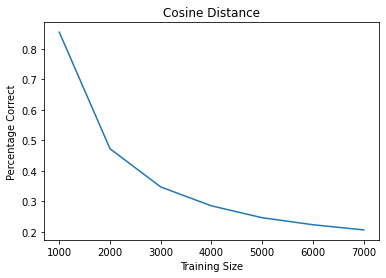

In [ ]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Training Size")
ax.set_ylabel("Percentage Correct")
ax.set_title("Cosine Distance")
ax.plot(cosineX,percentY)